<h1 align='center'>
<span style='color:orange'>
<b>
USING LINEAR REGRESSION MODEL PREDICT FINAL HOUSE LOAN
</b>
</p>
</h1>

## **| Process**

1. Read and Load data
2. Data Analysis
3. Data Preprocessing
4. Feature Enginering
5. Build and Training Linear Regression model 
6. Show the model's intercepts, coeficients by using Ridge, Lasso and ElasticNet and compare the error of 3 algorithms
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?

<br>

In this notebook, we will evaluate our model by using Mean Absolute Error (MAE).

<br>

<h2 align='center'>
<span style='background:black; color: orange'>
<b>
1 | Read and Load data
</b>
</span>
</h2>

This is a dataset related to how much money a person can get from a mortgage on his or her home, includes the following features:

- **Gender**: Gender of the borrower (including two values 'F' and 'M').
- **Age**: Age of the customer applying for a loan (including positive integer values).
- **Income (USD)**: Customer's income in USD (value is a positive number).
- **Income Stability**: The level of customer's income stability (including three values of Low and High).
- **Property Age**: Life expectancy of the house in days (including positive integer values).
- **Property Location**: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban').
- **Property Price**: The value of the house in USD (including positive real values).
- **Loan Sanction Amount** (USD): Amount that customers can borrow in USD (target value).

In [ ]:
import math
import numpy as np
import pandas as pd

import sys
from supervised_learning_models import utils

ModuleNotFoundError: No module named 'supervised_learning_models'

In [36]:
print(sys.path)

['/Library/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload', '', '/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages', 'Machine-Learning-Basics-Models', 'Machine-Learning-Basics-Models', 'utils', 'utils', 'utils', 'utils']


In [13]:
df = read_dataset('final_house_loan.csv')

The first three rows of this data frame:


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002


Description of this dataframe:


,count,mean,std,min,25%,50%,75%,max
Age,47297.0,40.000063,16.086128,18.000000,24.000000,40.000000,55.000000,6.500000e+01
Income (USD),47265.0,2586.684384,1558.768809,372.700000,1653.740000,2245.480000,3128.560000,5.466275e+04
Property Age,47263.0,2586.611058,1558.842286,370.700000,1652.820000,2244.810000,3128.380000,5.464775e+04
Property Price,47297.0,135088.045810,94578.752770,7859.620000,62504.080000,113093.600000,181954.630000,1.077967e+06
Loan Sanction Amount (USD),47297.0,46487.229765,32549.905634,254.586578,21782.822159,38822.132402,62612.236905,3.661312e+05


<br>

Establish essential modules and define unified style for plotting:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

font = {
  'fontsize': 16,
  'fontstyle': 'italic',
  'backgroundcolor': 'black',
  'color': 'white'
}

%matplotlib inline

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

<h2 align='center'>
<span style='background:black; color: orange'>
<b>
2 | Data Analysis
</b>
</span>
</h2>

In [15]:
# Check null values
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [16]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
2.1 | Classify data
</b>
</span>
</h3>

Now we classify the data based on its data types: category and numeber, making it easier to visualize them and understand more about our data.

In [17]:
[print(f'{col} - total unique values: {df[col].nunique()}') for col in df.columns]
print('\nSố lượng unique values bằng 2 là Categorical columns, lớn hơn 2 là Numerical columns.')

Gender - total unique values: 2
Age - total unique values: 48
Income (USD) - total unique values: 40936
Income Stability - total unique values: 2
Property Age - total unique values: 40923
Property Location - total unique values: 3
Property Price - total unique values: 15450
Loan Sanction Amount (USD) - total unique values: 45437

Số lượng unique values bằng 2 là Categorical columns, lớn hơn 2 là Numerical columns.


In [18]:
categorical_df = df.select_dtypes(exclude='number')
categorical_cols = [col for col in categorical_df.columns]

numerical_df = df.select_dtypes(include='number')
numeric_cols = [col for col in numerical_df.columns]

print(f'Categorical columns = {categorical_cols}\nNumerical columns = {numeric_cols}')

Categorical columns = ['Gender', 'Income Stability', 'Property Location']
Numerical columns = ['Age', 'Income (USD)', 'Property Age', 'Property Price', 'Loan Sanction Amount (USD)']


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
2.2 | Visualize Categorical data
</b>
</span>
</h3>

In [24]:
categorical_df

,Gender,Income Stability,Property Location
0,F,Low,Rural
1,M,Low,Urban
2,F,Low,Rural
3,M,High,Rural
4,F,High,Urban
...,...,...,...
47292,F,Low,Rural
47293,M,Low,Rural
47294,F,Low,Semi-Urban
47295,F,Low,Semi-Urban


TypeError: 'Axes' object is not subscriptable

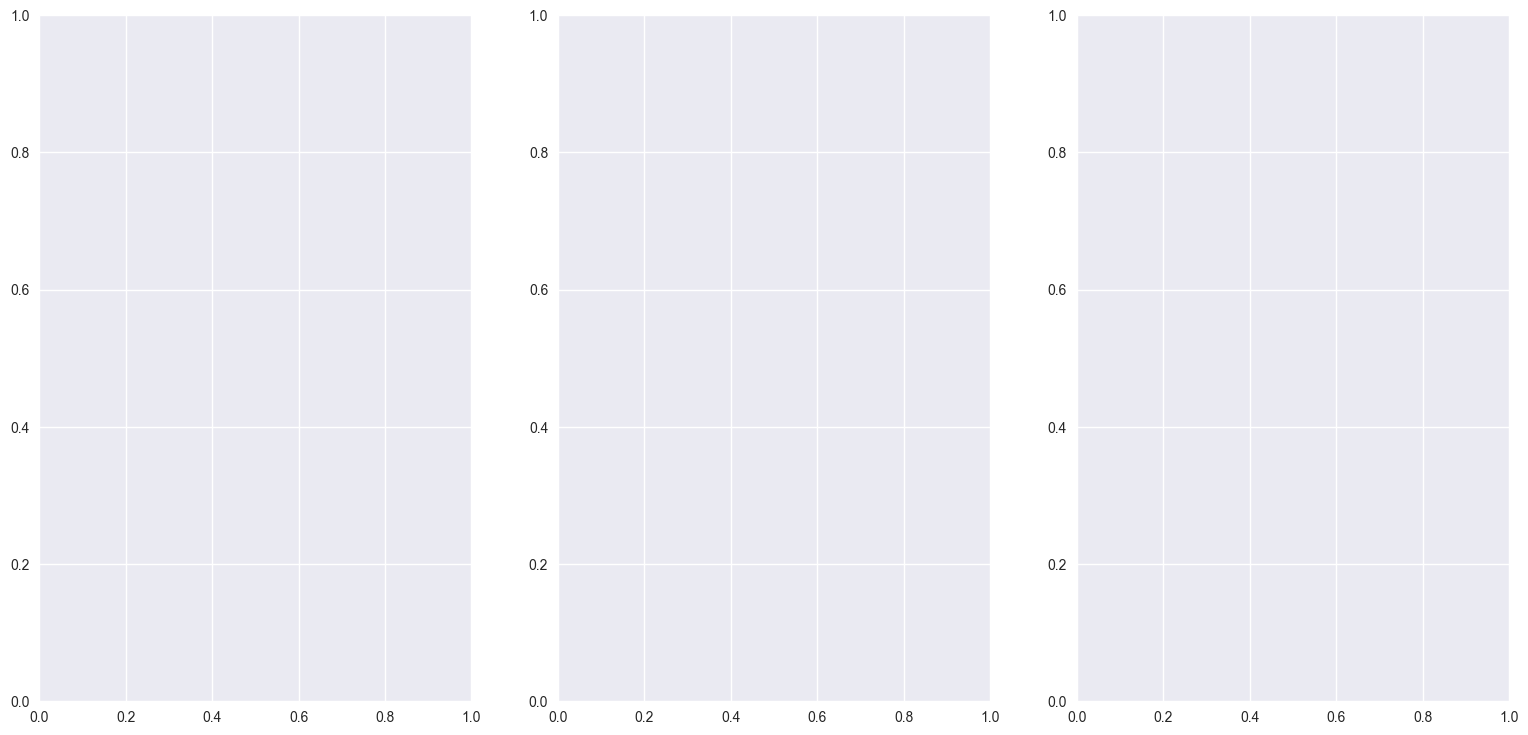

In [ ]:
def draw_pieplot(df: pd.DataFrame, ncols: int, figsize: tuple) -> None:

  fig, axes = plt.subplots(
    nrows=math.ceil(df.shape[1] / ncols), 
    ncols=ncols, 
    figsize=figsize
  )

  for i, col in enumerate(df.columns):
      ax = axes[i // ncols][i % ncols]
      ax.pie(
        df[col].value_counts(),
        labels=df[col].value_counts().index,
        colors=sns.color_palette('YlOrBr'),
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90
      )
      ax.set_title(f'Pie plot of {col}', fontdict=font, pad=15)
      
  plt.tight_layout()
  plt.show()

draw_pieplot(categorical_df, 3, (15, 5))

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
2.2 | For Numerical dataframe
</b>
</span>
</h3>

In [51]:
numerical_df = df.select_dtypes('number')
numerical_df.head(3)

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
0,19,1641.25,1651.25,59641.82,21026.420753
1,29,1989.71,1990.71,179858.51,60595.183366
2,37,1849.91,1856.91,117297.62,39181.648002


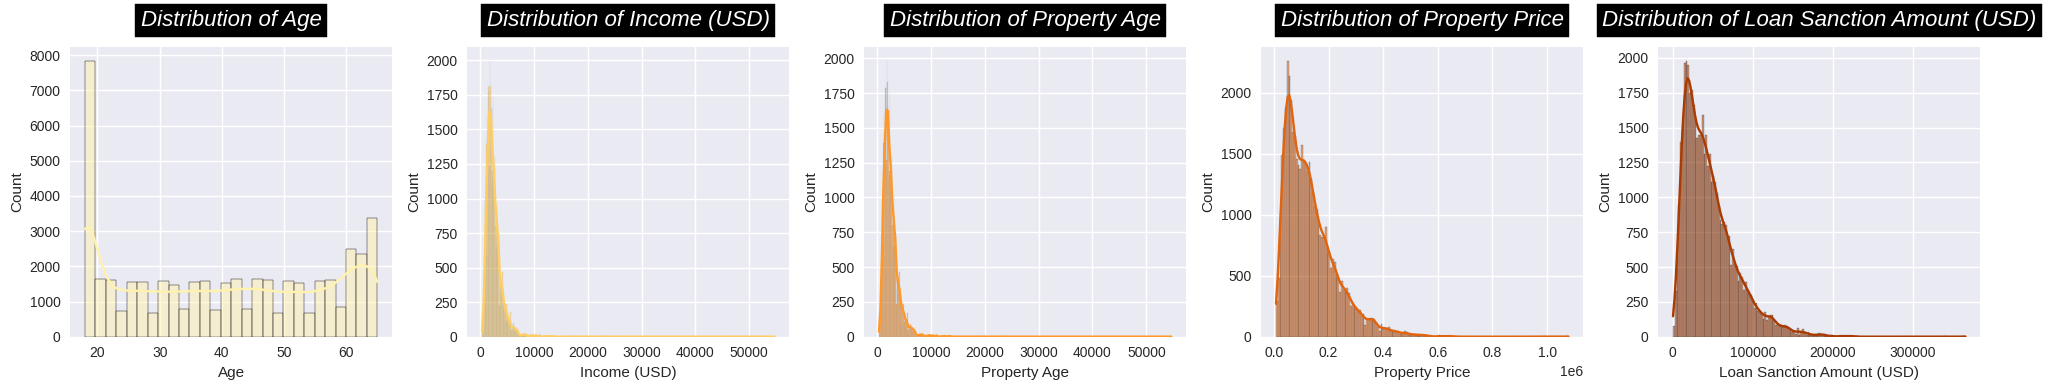

In [52]:
fig, axes = plt.subplots(1, len(numerical_df.columns), 
                         figsize=(20, 4))

colors = sns.color_palette('YlOrBr', len(numerical_df.columns))

for ax, col, color in zip(axes, numerical_df.columns, colors):    
    sns.histplot(numerical_df[col],
                 ax=ax,
                 kde=True,
                 color=color)
    ax.set_title(f'Distribution of {col}', fontdict=font, pad=15)
    
plt.tight_layout()
plt.show()

<br>

<h2 align='center'>
<span style='background:black; color:orange'>
<b>
3| Preprocess Data
</b>
</span>
</h2>

In [53]:
filtered_df = df.copy()

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
3.1 | Clean Data
</b>
</span>
</h3>

In [54]:
missing_value = filtered_df.isnull().sum()
missing_value

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

Calculate the percentage of missing_value per total dataset:

In [55]:
for i in range(missing_value.size):
    print(f'The percentage of missing values in \'{filtered_df.columns[i]}\' column per total dataset: {missing_value[i]/len(filtered_df) * 100}%')

The percentage of missing values in 'Gender' column per total dataset: 0.0%
The percentage of missing values in 'Age' column per total dataset: 0.0%
The percentage of missing values in 'Income (USD)' column per total dataset: 0.06765756813328541%
The percentage of missing values in 'Income Stability' column per total dataset: 0.02537158804998203%
The percentage of missing values in 'Property Age' column per total dataset: 0.07188616614161575%
The percentage of missing values in 'Property Location' column per total dataset: 0.006342897012495507%
The percentage of missing values in 'Property Price' column per total dataset: 0.0%
The percentage of missing values in 'Loan Sanction Amount (USD)' column per total dataset: 0.0%


<br>

Because all parameters are very low, so we drop all missing values.

In [56]:
for column in filtered_df.columns:
    filtered_df.dropna(subset=[column], axis=0, inplace=True)

In [57]:
filtered_df.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
3.2 | Detect Outlier
</b>
</span>
</h3>

In [58]:
def remove_outliers(df: pd.DataFrame, col: str, thresh: float=1.5):
    
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound, upper_bound = q1 - (thresh * iqr), q3 + (thresh * iqr)
    
    df_filtered = df[ df[col] >= lower_bound ]
    df_filtered = df_filtered[ df_filtered[col] <= upper_bound ]
    
    return df_filtered    

In [59]:
for col in numerical_df.columns:
    filtered_df = remove_outliers(filtered_df, col)

print(f'The shape of data before preprocessing: {df.shape}')
print(f'The shape of data after preprocessing: {filtered_df.shape}')

The shape of data before preprocessing: (47297, 8)
The shape of data after preprocessing: (42995, 8)


Update subset dataframe:

In [60]:
categorical_df = filtered_df.select_dtypes(include=[object])
numerical_df = filtered_df.select_dtypes(include=[np.number])

<br>
<h2 align='center'>
<span style='background:black; color:orange'>
<b>
4| Feature Enginering
</b>
</span>
</h2>

In [61]:
# for scaling:
from sklearn.preprocessing import MinMaxScaler

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
4.1 | Discrete data (Categorical columns)
</b>
</span>
</h3>

In [62]:
scaled_discrete_df = categorical_df.copy()

scaled_discrete_df = pd.get_dummies(categorical_df,
                                    columns=categorical_df.columns,
                                    drop_first=True,
                                    dtype=int)

scaled_discrete_df.head(3)

,Gender_M,Income Stability_Low,Property Location_Semi-Urban,Property Location_Urban
0,0,1,0,0
1,1,1,0,1
2,0,1,0,0


`drop_first=True`: Drop 1st category in each columns to avoid multicollinearity issues in some models (like linear regression).

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
4.2 | Continuos data (Numerical columns)
</b>
</span>
</h3>

In [63]:
scaled_continous_df = numerical_df.copy()

scaled_continous_df[numerical_df.columns] = MinMaxScaler().fit_transform(filtered_df[numerical_df.columns])

scaled_continous_df.head(3)

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
0,0.021277,0.272677,0.275282,0.156941,0.186052
1,0.234043,0.347580,0.348256,0.521292,0.540466
2,0.404255,0.317529,0.319493,0.331684,0.348666


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
4.3 | For all data
</b>
</span>
</h3>

In [64]:
scaled_df = pd.concat([scaled_discrete_df, scaled_continous_df], axis=1)

scaled_df.head(3)

,Gender_M,Income Stability_Low,Property Location_Semi-Urban,Property Location_Urban,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
0,0,1,0,0,0.021277,0.272677,0.275282,0.156941,0.186052
1,1,1,0,1,0.234043,0.347580,0.348256,0.521292,0.540466
2,0,1,0,0,0.404255,0.317529,0.319493,0.331684,0.348666


Now we draw heatmap to see the correlation between all features in our dataset.

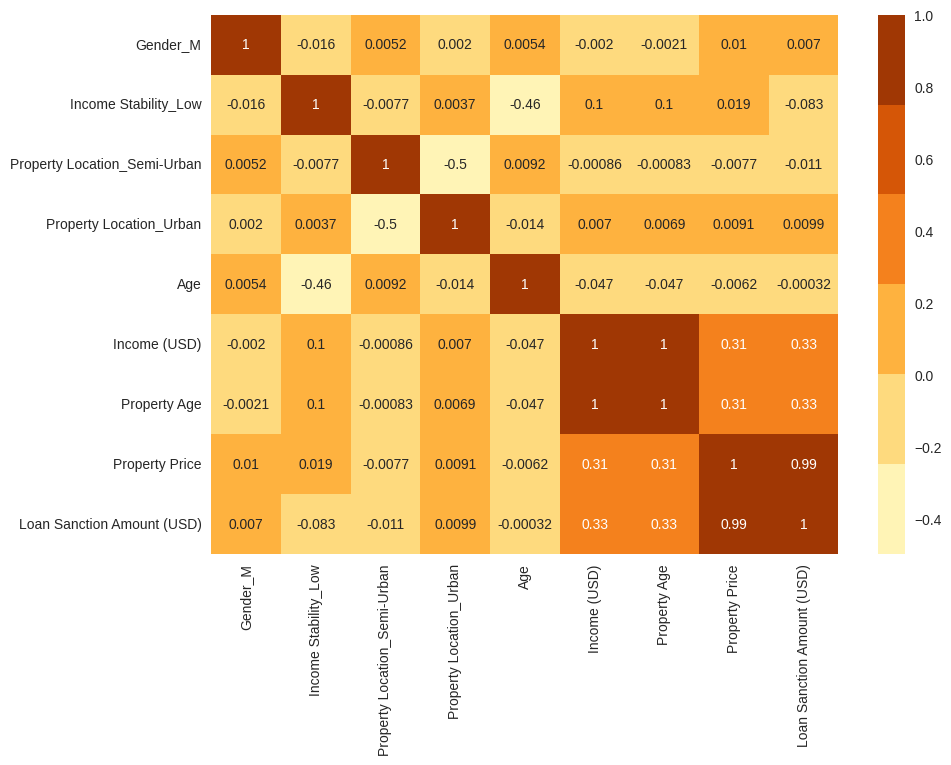

In [65]:
sns.heatmap(scaled_df.corr(), annot=True, cmap=sns.color_palette('YlOrBr'))
plt.show()

<br>

<h2 align='center'>
<span style='background:black; color:orange'>
<b>
5| Build and Train model
</b>
</span>
</h2>

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
5.1 | Split data
</b>
</span>
</h3>

In [66]:
# for split train-test:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [67]:
X, y = scaled_df.drop(columns=['Loan Sanction Amount (USD)']), scaled_df['Loan Sanction Amount (USD)']

In [68]:
def split_train_test(X, y: float, train_size: float=0.7):
    
    train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                        train_size=train_size,
                                                        random_state=24,
                                                        shuffle=True)
    print(f'Training: {str(train_X.shape)}')
    print(f'Test: {str(test_X.shape)}')
    
    return train_X, test_X, train_y, test_y

In [69]:
TRAIN_SIZE = 0.7

X_train, X_test ,y_train, y_test = split_train_test(X, y, train_size=TRAIN_SIZE)

Training: (30096, 8)
Test: (12899, 8)


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
5.2 | Apply Linear Regression Model
</b>
</span>
</h3>

Show the model's intercept and coeficent:

In [70]:
def show_predict_params(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    print(f'MAE of {model} model on Training set: {mean_absolute_error(y_pred=model.predict(X_train), y_true=y_train)}')
    print(f'MAE of {model} model on Testing set: {mean_absolute_error(y_pred=model.predict(X_test), y_true=y_test)}\n')

    # Model's intercept and coeficient:
    print(f'Model\'s Intercept: {model.intercept_}')
    print(f'Model\'s Coeficient: {model.coef_}')

<br>

Build our Linear Regression model:

In [71]:
# for modeling:
from sklearn.linear_model import LinearRegression

In [72]:
def build_linear_model(X, y):

    model = LinearRegression()
    model.fit(X, y)
    
    return model

In [73]:
linear_model = build_linear_model(X_train, y_train)

show_predict_params(model=linear_model)

MAE of LinearRegression() model on Training set: 0.0008123334446083036
MAE of LinearRegression() model on Testing set: 0.0007647815902235231

Model's Intercept: 0.11959415869124282
Model's Coeficient: [-0.00204323 -0.10013464 -0.00256543 -0.00119619 -0.03336023  0.02169647
  0.02143111  0.99287175]


<br>

<h2 align='center'>
<span style='background:black; color:orange'>
<b>
6 | Using evaluation metrics
</b>
</span>
</h2>

In [74]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
6.1 | Ridge algorithm
</b>
</span>
</h3>

<br>

Linear least squares with l2 regularization. Minimizes the objective function:

$$||y - Xw||^2_2 + alpha * ||w||^2_2$$

`alpha: {float=[0, inf) or ndarray of shape (n_targets,), default=1.0`: When **alpha=0** it became Linear Regression problem.

This estimator has built-in support for multi-variate regression (i.e., **when y is a 2D-array of shape (n_samples, n_targets)**).

In [75]:
def choose_alpha(model, alpha, X_train=X_train, y_train=y_train, X_test=X_test):

    param_grid = {'alpha': alpha}
    
    grid_search = GridSearchCV(model,
                               param_grid=param_grid,
                               cv=5,  # fold, default=5
                               scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    
    print("Mean Absolute Error:", mae)
    print("Best alpha:", grid_search.best_params_['alpha'])
    print("Coefficients:", grid_search.best_estimator_.coef_)

In [76]:
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1.0]
choose_alpha(Ridge(), alpha)

Mean Absolute Error: 0.0007646735682725361
Best alpha: 0.1
Coefficients: [-0.00204291 -0.10012941 -0.00256553 -0.00119598 -0.03335718  0.02160323
  0.0215471   0.99279694]


<br>

Build Ridge model and show model's intercept and coeficient:

In [77]:
def build_ridge_model(X, y, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    return model

ridge_model = build_ridge_model(X_train, y_train, 0.1)
show_predict_params(model=ridge_model)

MAE of Ridge(alpha=0.1) model on Training set: 0.0008122954981643146
MAE of Ridge(alpha=0.1) model on Testing set: 0.0007646735682725361

Model's Intercept: 0.11960354937511078
Model's Coeficient: [-0.00204291 -0.10012941 -0.00256553 -0.00119598 -0.03335718  0.02160323
  0.0215471   0.99279694]


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
6.2 | Lasso algorithm
</b>
</span>
</h3>

<br>

The Lasso is a linear model that estimates sparse coefficients. The objective function to minimize is:

$$min_w \ \frac{1}{2 \ n_{samples}} ||Xw - y||^2_2 + alpha ||w||_1 $$

The lasso estimate thus solves the minimization of the least-squares penalty with $alpha ||w||_1$ added, where: `alpha=const` and $||w||_1$ is the l1-norm of the **coefficient vector**.

In [78]:
alpha = [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1, 1.0]
choose_alpha(Lasso(), alpha)

Mean Absolute Error: 0.0007654165818198839
Best alpha: 1e-08
Coefficients: [-0.00204427 -0.10013267 -0.00256539 -0.00119689 -0.03335937  0.04151382
  0.00161698  0.99287233]


<br>

Build Lasso model and show model's intercept and coeficient:

In [79]:
def build_lasso_model(X, y, alpha):
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    return model

lasso_model = build_lasso_model(X_train, y_train, 1e-8)
show_predict_params(lasso_model)

MAE of Lasso(alpha=1e-08) model on Training set: 0.000812654830157602
MAE of Lasso(alpha=1e-08) model on Testing set: 0.0007654165818198839

Model's Intercept: 0.11960035484879267
Model's Coeficient: [-0.00204427 -0.10013267 -0.00256539 -0.00119689 -0.03335937  0.04151382
  0.00161698  0.99287233]


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
6.3 | ElasticNet algorithm
</b>
</span>
</h3>

<br>

ElasticNet is regression model combine Ridge Regression (L2) and Lasso Regression (L1).

The objective function to minimize is in this case:

$$min_w \ \frac{1}{2 \ n_{samples}} ||Xw - y||^2_2 + alpha \ \rho ||w||_1 + \frac{alpha (1 - \rho)}{2} ||w||^2_2 $$

In [80]:
def choose_param(model, alpha, l1_ratio,X_train=X_train, y_train=y_train, X_test=X_test):
    
    param_grid = {
        'alpha': alpha,
        'l1_ratio': l1_ratio
    }
    
    grid_search = GridSearchCV(model,
                               param_grid=param_grid,
                               cv=5,  # fold, default=5
                               scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    print("Best params:", grid_search.best_params_)
    print("Coefficients:", grid_search.best_estimator_.coef_)

In [81]:
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1.0]
l1_ratio = [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1]

choose_param(ElasticNet(), alpha, l1_ratio)

Mean Absolute Error: 0.0007650667288726855
Best params: {'alpha': 1e-05, 'l1_ratio': 1e-08}
Coefficients: [-0.00204296 -0.10011802 -0.00256578 -0.00119604 -0.03335063  0.03382159
  0.00937989  0.99264618]


<br>

Build ElasticNet model and show model's intercept, coeficient:

In [82]:
def build_elasticNet_model(X, y, alpha, l1_ratio):
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X, y)
    
    return model

elasticNet_model = build_elasticNet_model(X_train, y_train, 1e-05, 1e-08)
show_predict_params(elasticNet_model)

MAE of ElasticNet(alpha=1e-05, l1_ratio=1e-08) model on Training set: 0.0008126097844787848
MAE of ElasticNet(alpha=1e-05, l1_ratio=1e-08) model on Testing set: 0.0007650667288726855

Model's Intercept: 0.1196255868229969
Model's Coeficient: [-0.00204296 -0.10011802 -0.00256578 -0.00119604 -0.03335063  0.03382159
  0.00937989  0.99264618]


<br>
<h2 align='center'>
<span style='background:black; color:orange'>
<b>
7 | Polynomial Transform
</b>
</span>
</h2>

In [83]:
# Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Scikit-Learn supports converting data features to polynomials through `PolynomialFeatures`.

$$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots$$

The formula above uses the transformation $x$ from 1-D to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [84]:
def build_pipeline(X, y, dimension):
    
    poly_model = make_pipeline(PolynomialFeatures(dimension, include_bias=False), 
                               LinearRegression())
    poly_model.fit(X, y)

    return poly_model

We use `make_pipeline` to apply PolynomialFeatures and a Regression model train your dataset and compare the predict value:

In [85]:
poly_model = build_pipeline(X_train, y_train, 2)

poly_pred = poly_model.predict(X_train)
print(f'MAE of linear model (with poly transform) on Training set: {mean_absolute_error(y_pred=poly_pred, y_true=y_train)}\n' )

poly_pred = poly_model.predict(X_test)
print(f'MAE of linear model (with poly transform) on Testing set: {mean_absolute_error(y_pred=poly_pred, y_true=y_test)}')

MAE of linear model (with poly transform) on Training set: 0.0009629777029943566

MAE of linear model (with poly transform) on Testing set: 0.000917919877546803


<br>

<div class='alert alert-warning' role='alert'>
<strong>What will the result be if we choose the n order too high?</strong>

Choosing a polynomial order that is too high can lead to overfitting, increased variance, and computational complexity. It's crucial to use techniques like cross-validation to select an appropriate polynomial degree that balances bias and variance, ensuring good generalization to new, unseen data.
</div>